# Linear Regression with Boston Housing Dataset

In [1]:
from __future__ import division, print_function
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
%matplotlib inline

In [2]:
DATA_DIR = "../../data"

## Prepare Data

In [3]:
fdata = open(os.path.join(DATA_DIR, "housing.data"), "rb")
data, prices = [], []
for line in fdata:
    cols = [float(x) for x in line.strip().split()]
    data.append(np.array(cols[:-1]))
    prices.append(cols[-1])
fdata.close()

X = np.array(data)
y = np.array(prices).reshape(-1, 1)
print(X.shape, y.shape)

(506, 13) (506, 1)


In [4]:
X[0]

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00])

In [5]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, y, train_size=0.9)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(455, 13) (455, 1) (51, 13) (51, 1)


## Define Network

In [28]:
X = tf.placeholder(tf.float32, [None, 13], name="X")
y = tf.placeholder(tf.float32, [None, 1], name="y")

In [29]:
W = tf.Variable(tf.random_normal([13, 1]), name="W")
b = tf.Variable(tf.random_normal([1, 1]), name="b")

In [30]:
y_ = tf.add(tf.matmul(X, W), b)

In [31]:
loss = tf.reduce_mean(tf.pow(y - y_, 2))

In [32]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

## Train Network

In [33]:
losses, preds = [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_loss, epsilon, num_steps = None, None, 0
    while True:
        if num_steps % 1000 == 0 and num_steps > 0:
            print("# steps: {:d}, loss: {:.3f}, epsilon: {:.5f}"
                .format(num_steps, prev_loss, epsilon))
        _, loss_val = sess.run([optimizer, loss], feed_dict={
            X: Xtrain, y: ytrain})
        losses.append(loss_val)
        if prev_loss == None:
            epsilon = loss_val
        else:
            epsilon = prev_loss - loss_val
        if epsilon < 1e-5:
            break
        prev_loss = loss_val
        num_steps += 1
    print("# steps: {:d}, loss: {:.3f}, epsilon: {:.5f}"
        .format(num_steps, prev_loss, epsilon))
    W_val, b_val = sess.run([W, b])

# steps: 1000, loss: 507.533, epsilon: 0.06183
# steps: 2000, loss: 452.737, epsilon: 0.04904
# steps: 3000, loss: 407.861, epsilon: 0.04147
# steps: 4000, loss: 368.677, epsilon: 0.03729
# steps: 5000, loss: 332.842, epsilon: 0.03452
# steps: 6000, loss: 299.624, epsilon: 0.03198
# steps: 7000, loss: 268.803, epsilon: 0.02966
# steps: 8000, loss: 240.127, epsilon: 0.02766
# steps: 9000, loss: 213.392, epsilon: 0.02583
# steps: 10000, loss: 188.521, epsilon: 0.02397
# steps: 11000, loss: 165.497, epsilon: 0.02211
# steps: 12000, loss: 144.309, epsilon: 0.02028
# steps: 13000, loss: 124.942, epsilon: 0.01849
# steps: 14000, loss: 107.382, epsilon: 0.01665
# steps: 15000, loss: 91.611, epsilon: 0.01490
# steps: 16000, loss: 77.608, epsilon: 0.01313
# steps: 17000, loss: 65.346, epsilon: 0.01139
# steps: 18000, loss: 54.794, epsilon: 0.00972
# steps: 19000, loss: 45.913, epsilon: 0.00806
# steps: 20000, loss: 38.651, epsilon: 0.00647
# steps: 21000, loss: 32.941, epsilon: 0.00496
# steps:

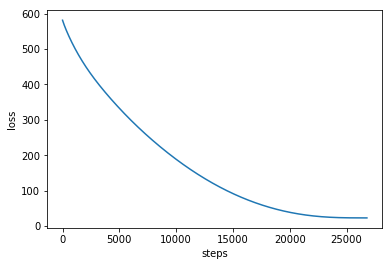

In [34]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("steps")
plt.ylabel("loss")

## Predictions

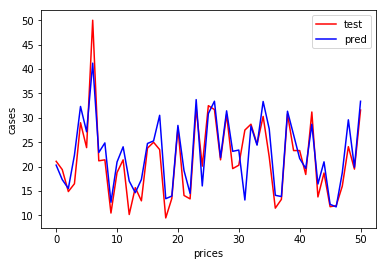

In [52]:
from sklearn.metrics import accuracy_score

ytest_ = np.dot(Xtest, W_val) + b_val
plt.plot(np.arange(ytest.shape[0]), ytest, color="r", label="test")
plt.plot(np.arange(ytest_.shape[0]), ytest_, color="b", label="pred")
plt.legend(loc="best")
plt.ylabel("cases")
plt.xlabel("prices")